In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the dataset
data = pd.read_csv("Language Detection.csv")

In [3]:
# value count for each language
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [5]:
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)

In [7]:
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [55]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=4)

In [56]:
#model creation and prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [57]:
# prediction 
y_pred = model.predict(x_test)

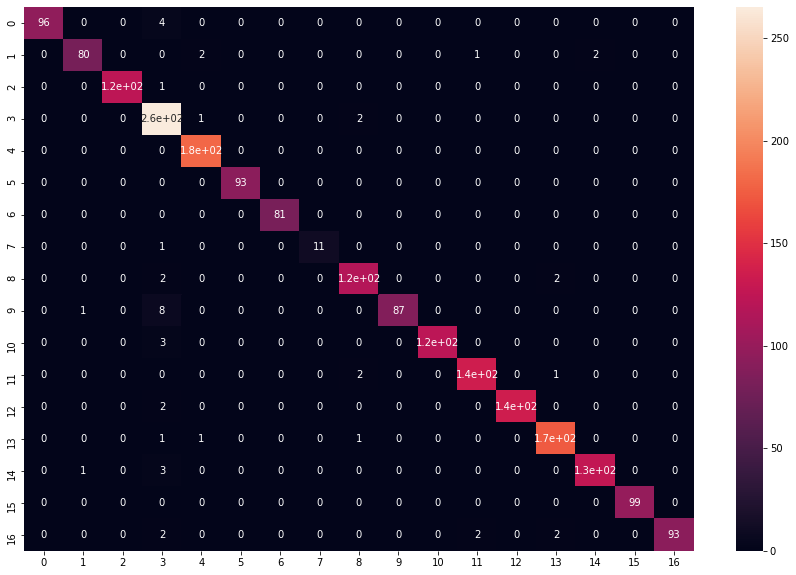

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [60]:
# function for predicting language
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [63]:
predict("We would also like to ask you to implement a method to identify the language a document is written in.")

The langauge is in English


In [64]:
predict("Wir möchten Sie auch bitten, eine Methode zu implementieren, um die Sprache zu identifizieren, in der ein Dokument geschrieben ist.")

The langauge is in German


In [65]:
predict("हम आपसे यह भी कहना चाहेंगे कि जिस भाषा में दस्तावेज़ लिखा गया है, उसकी पहचान करने के लिए एक विधि लागू करें।")

The langauge is in Hindi


In [66]:
predict("Nous aimerions également vous demander de mettre en œuvre une méthode pour identifier la langue dans laquelle un document est écrit.")

The langauge is in French
